# Ch02.03. 막대그래프

---
* 날짜:2022-04-18
* 이름:안창덕

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')
```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [6, 4]
#plt.style.use('seaborn-white')
#sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### **| 기본사용**

```
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()
```

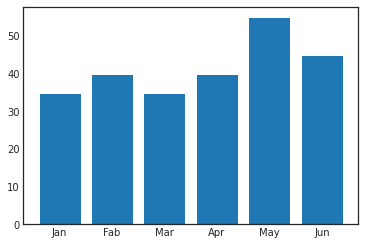

In [ ]:
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)   #막대그래프는 x값이 반드시 있어야됨
plt.show()

#### **| 옵션**

```
plt.bar(xs, nums, 
        color = '색깔'
        edgecolor='테두리색'
        width/ height=바의 너비/높이
        linewidth=테두리두께
        align=눈금위치('center'/'edge'), 
        tick_label=[])
```

<BarContainer object of 6 artists>

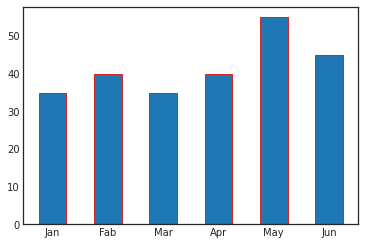

In [ ]:
plt.bar(xs, nums, color = 'C0', edgecolor='C3' , width=0.5)

#### **| 수평 막대그래프**


```
plt.barh(xs, nums)
```

<BarContainer object of 6 artists>

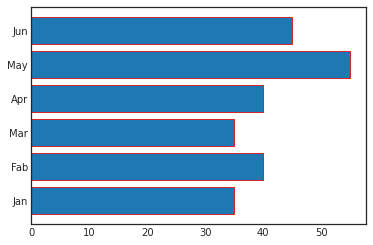

In [ ]:
plt.barh(xs, nums, color = 'C0', edgecolor='C3')

### (2) Seaborn 으로 그리기




#### **| 기본사용**

```
sns.barplot(x=xs, y=nums)
```

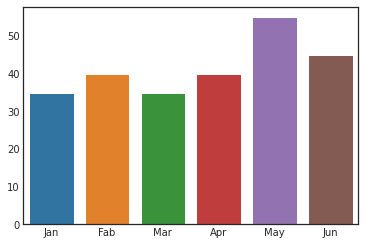

In [ ]:
sns.barplot(x=xs, y=nums)

#### **| 옵션**

```
seaborn.barplot(x=None, y=None, 
                color=None, 
                palette=None, # 컬러맵
                saturation=0.75, # 밝기
                )
```

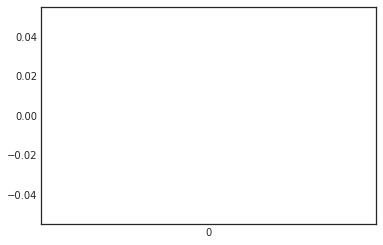

In [ ]:
sns.barplot(x=None, y=None, 
                color=None, 
                palette=None, # 컬러맵
                saturation=0.75, # 밝기
                )

#### **| 수평 막대그래프**


```
sns.barplot(x=nums, y=xs)
```

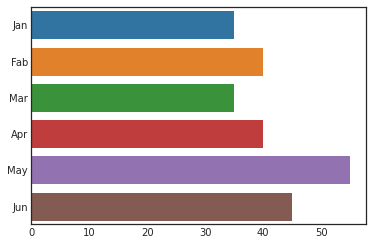

In [ ]:
sns.barplot(x=nums, y=xs) # x, y 값을 바꾸면 수평이됨

#### **| DataFrame 사용**



* 데이터 프레임을 만들어 줍니다.



In [ ]:
df = pd.DataFrame([xs, nums]).T
df.columns= ['Month', 'Count']
df

,Month,Count
0,Jan,35
1,Fab,40
2,Mar,35
3,Apr,40
4,May,55
5,Jun,45


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.bar(x=x,y=y)   x값은 칼럼명
```




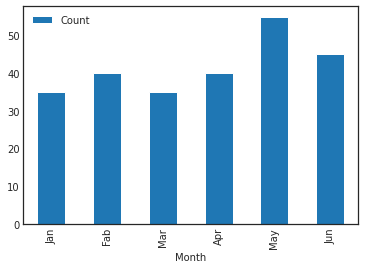

In [ ]:
df.plot.bar(x='Month',y='Count') 

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.barplot(data=df,x=x, y=y)
```


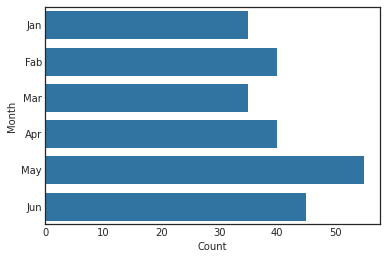

In [ ]:
sns.barplot(data=df,x='Count', y='Month', color='C0') #palette='Blues', saturation=10)


## **실습**


---




### (1) 과일 데이터 시각화


```
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)
```

In [ ]:
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)
fresh, qual, price, sale

(array([7, 4, 8]),
 array([5, 7, 3]),
 array([1214, 1330, 1458]),
 array([ 787, 1072,  799]))

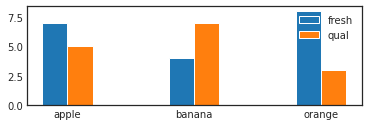

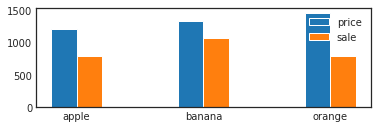

In [ ]:
idx=np.arange(3) 
width=0.2

plt.subplot(2, 1, 1)
plt.bar(idx, fresh, label='fresh', width=width)
plt.bar(idx+width, qual, label='qual', width=width)
plt.legend()
plt.xticks(idx+(width/2), fruits)
plt.show()


plt.subplot(2, 1, 2)
plt.bar(idx, price, label='price', width=width)
plt.bar(idx+width, sale, label='sale', width=width)
plt.legend()
plt.xticks(idx+(width/2), fruits)
plt.show()

### (2) **kwargs 이용한 옵션적용




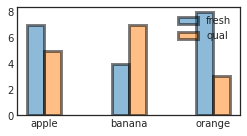

In [ ]:
plt.figure(figsize=(4,2))


style= dict( width = width, alpha=0.5, linewidth=3, edgecolor='k')



plt.bar(idx, fresh, label='fresh', **style)
plt.bar(idx+width, qual, label='qual', **style)
plt.legend()
plt.xticks(idx+(width/2), fruits)
plt.show()



## 과제


### (1) 막대그래프를 이용한 flight 데이터 시각화

```
df=sns.load_dataset('flights')
```

 `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러온 후 아래와 같은 플롯을 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0203-01.png?raw=true)





In [ ]:
df=sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
df.year==1950

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Name: year, Length: 144, dtype: bool

In [ ]:
mask = df.year==1950
df_a = df[mask]
mask = df.year==1955
df_b = df[mask]
mask = df.year==1960
df_c = df[mask]

df_a, df_b, df_c

(    year month  passengers
 12  1950   Jan         115
 13  1950   Feb         126
 14  1950   Mar         141
 15  1950   Apr         135
 16  1950   May         125
 17  1950   Jun         149
 18  1950   Jul         170
 19  1950   Aug         170
 20  1950   Sep         158
 21  1950   Oct         133
 22  1950   Nov         114
 23  1950   Dec         140,     year month  passengers
 72  1955   Jan         242
 73  1955   Feb         233
 74  1955   Mar         267
 75  1955   Apr         269
 76  1955   May         270
 77  1955   Jun         315
 78  1955   Jul         364
 79  1955   Aug         347
 80  1955   Sep         312
 81  1955   Oct         274
 82  1955   Nov         237
 83  1955   Dec         278,      year month  passengers
 132  1960   Jan         417
 133  1960   Feb         391
 134  1960   Mar         419
 135  1960   Apr         461
 136  1960   May         472
 137  1960   Jun         535
 138  1960   Jul         622
 139  1960   Aug         606
 140  1960 

In [ ]:
x_mean = np.mean(np.array([df_a.passengers, df_b.passengers, df_c.passengers]), axis=0)

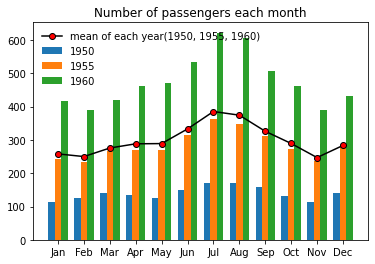

In [ ]:
width=0.25
idx = np.arange(12)

plt.bar(idx - width, df_a.passengers, width=width, label='1950')
plt.bar(idx, df_b.passengers, width=width, label='1955')
plt.bar(idx + width, df_c.passengers, width=width, label='1960')
plt.plot(x_mean, marker='o', color='k', markerfacecolor='r', label='mean of each year(1950, 1955, 1960)')
plt.legend(loc='upper left', frameon=False)
plt.xticks(idx, df_a.month)
plt.title('Number of passengers each month')
plt.show()